In [24]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import timeit
from bm3d import bm3d, BM3DProfile
import matplotlib.pyplot as plt
import caiman.external.houghvst.estimation as est
from caiman.external.houghvst.gat import compute_gat, compute_inverse_gat
import caiman as cm
from caiman.paths import caiman_datadir

In [10]:
filename = '/home/janwillem/Data/Optosynth/raw/optosynth__1__20__5.tif'
movie = cm.load(filename)
movie = movie.astype(np.float32)[:300]
movie.shape

(300, 180, 512)

In [11]:
# makes estimation numerically better:
movie -= movie.mean()

# use one every 200 frames
temporal_stride = 100
# use one every 8 patches (patches are 8x8 by default)
spatial_stride = 6

movie_train = movie[::temporal_stride]

In [12]:
t = timeit.default_timer()
estimation_res = est.estimate_vst_movie(movie_train, stride=spatial_stride)
print('\tTime', timeit.default_timer() - t)
alpha = estimation_res.alpha
sigma_sq = estimation_res.sigma_sq

	initial alpha = 14.68768302533093; sigma^2 = 265.9851737114948
	Highest score= 416.114990234375
	mid alpha = 12.684817158240348; sigma^2 = 245.78315350947446
	Highest score= 418.5911865234375
	alpha = 12.784960451594877; sigma^2 = 247.80335552967648
	Time 34.22926246598945


In [63]:
movie_gat = compute_gat(movie, sigma_sq, alpha=alpha)
# save movie_gat here
movie_gat_inv = compute_inverse_gat(movie_gat, sigma_sq, alpha=alpha,
                                    method='asym')

In [64]:
%%time
movie_denoised = np.zeros(movie_gat_inv.shape, dtype=np.float32)
for i in range(3):
    movie_denoised[i] = bm3d(movie_gat_inv[i], sigma_psd=np.sqrt(sigma_sq))

CPU times: user 42 s, sys: 14.9 s, total: 56.9 s
Wall time: 6.05 s


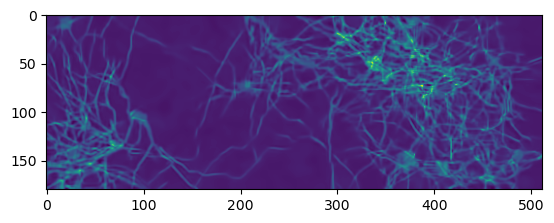

In [65]:
plt.imshow(movie_denoised[2])